# Numpy and Linear Regression

In [1]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

## Numpy
선형대수 라이브러리  
### Array Creation

In [11]:
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            
print(a.shape)            
print(a[0], a[1], a[2])   
a[0] = 5                  
print(a)                  

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     
print(b[0, 0], b[0, 1], b[1, 0])   

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


In [23]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              

b = np.ones((1,2))    # Create an array of all ones
print(b)              

c = np.full((2,2), 7)  # Create a constant array
print(c)               

d = np.eye(3)         # Create a 3x3 identity matrix
print(d)              

e = np.random.random((2,2))  # Create an array filled with random values
print(e)  

f = np.arange(5)
print(f)

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.62999179 0.74640686]
 [0.79857874 0.48619073]]
[0 1 2 3 4]


### Array Indexing

In [17]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

b = a[:2, 1:3] # first two rows, columns 1 and 2

print(a[0, 1]) 
b[0, 0] = 77 # b[0, 0] is equal to a[0, 1]
print(a[0, 1])   

2
77


In [18]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape) 
print(row_r2, row_r2.shape) 

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


In [19]:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print(col_r2, col_r2.shape) 

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


In [20]:
# When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. 
# In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:
a = np.array([[1,2], [3, 4], [5, 6]])

# below two are equivalent
print(a[[0, 1, 2], [0, 1, 0]]) 
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

print(a[[0, 0], [1, 1]])
print(np.array([a[0, 1], a[0, 1]]))

[1 4 5]
[1 4 5]
[2 2]
[2 2]


In [24]:
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b]) 

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


In [25]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx]) 

# We can do all of the above in a single concise statement:
print(a[a > 2])    

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


In [30]:
x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)        

x = np.array([1.0, 2.0])
print(x, x.dtype)             

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         

x = np.array([1.0, 2.0], dtype=np.int64)
print(x, x.dtype)             

int64
[1. 2.] float64
int64
[1 2] int64


### Array Manipulation

In [31]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum
print(x + y)
print(np.add(x, y))

# Elementwise difference
print(x - y)
print(np.subtract(x, y))

# Elementwise product
print(x * y)
print(np.multiply(x, y))

# Elementwise division
print(x / y)
print(np.divide(x, y))

# Elementwise square root
print(np.sqrt(x))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]
[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]
[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[1.         1.41421356]
 [1.73205081 2.        ]]


In [32]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product
print(x.dot(y))
print(np.dot(x, y))

219
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [33]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements
print(np.sum(x, axis=0))  # Compute sum of each column
print(np.sum(x, axis=1))  # Compute sum of each row

10
[4 6]
[3 7]


In [34]:
x = np.array([[1,2], [3,4]])
print(x)    
print(x.T)  

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    
print(v.T)  

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


### Braodcast
vision lecture라 유독 강조하는 것 같기도 함

In [35]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4): # loop can be slow
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [39]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other, axis는 앞(4)이 column, 뒤(1)가 row
print(vv)                 

y = x + vv  # Add x and vv elementwise
print(y)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [41]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(x.shape, v.shape)
print(y)

(4, 3) (3,)
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [43]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)

# To compute an outer product, we first reshape v to be a column vector of shape (3, 1)
# we can then broadcast it against w to yield an output of shape (3, 2), which is the outer product of v and w
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3)
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast against w to yield a result of shape (3, 2)
# transposing this result yields the final result of shape (2, 3) which is the matrix x with the vector w added to each column.
print((x.T + w).T)

# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3)
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


## Linear Regression and Logistic Regression

In [2]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [3]:
from google.colab import files
files.upload()

Saving open.zip to open.zip


In [4]:
!unzip open.zip

Archive:  open.zip
   creating: open/
 extracting: open/sample_submission.csv  
 extracting: open/test.csv           
 extracting: open/train.csv          


In [44]:
!ls open

sample_submission.csv  test.csv  train.csv


In [6]:
data_dir = Path('./open/')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
seed = 42

In [7]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


### Numpy Linear Regression

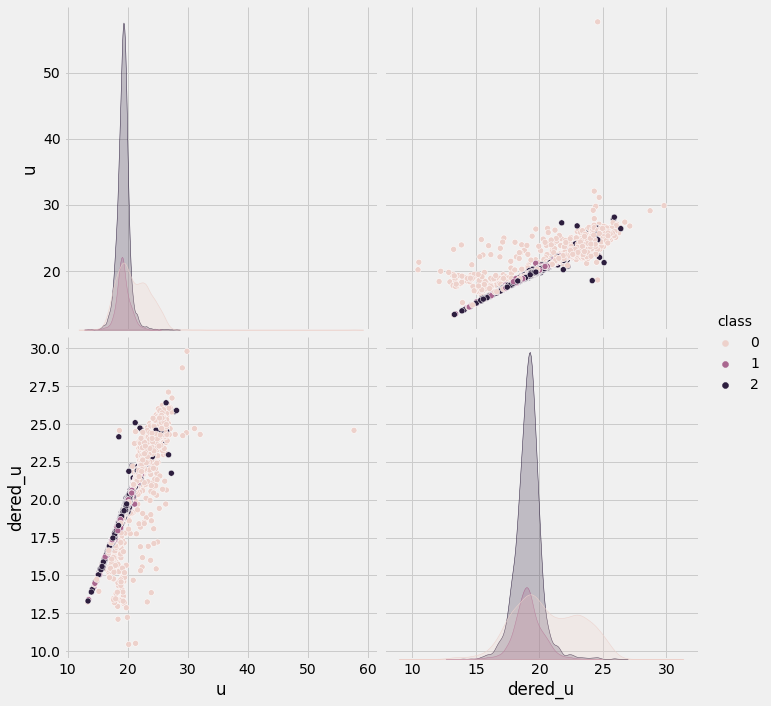

In [8]:
sns.pairplot(trn.sample(n=10000), vars=['u', 'dered_u'], hue='class', size=5)
# u - dered_u 사이에 correlation이 존재 -> 이 둘에 대해서 선형 회귀를 시도

In [45]:
X = trn[trn['class'] != 0][['u']].values
y = trn[trn['class'] != 0]['dered_u'].values
print(X.shape, y.shape)

(200004, 1) (200004,)


In [46]:
rmse = lambda y, p: np.sqrt(np.mean((y - p) ** 2)) # root mean squared error

In [47]:
alpha = .001  # learning rate
theta0 = .1   # 상수부 초기값
theta1 = .1   # X의 계수 초기값
epoch = 4

In [48]:
x = X.flatten()
print(x.shape)

(200004,)


In [49]:
rmses = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(x, y):
        p_i =  theta0 + theta1 * x_i
        theta0 = theta0 + alpha * (y_i - p_i) # 손실 함수를 MSE로 쓸 때의 편미분 결과
        theta1 = theta1 + alpha * (y_i - p_i) * x_i
    rmses.append(rmse(y, theta0 + theta1 * x))

In [50]:
theta1, theta0

(0.9362306162023849, 1.1088813148478316)

In [51]:
rmses # epoch 진행에 따라 조금씩 감소

[0.25618215910731906,
 0.25492967552380746,
 0.25461791287963526,
 0.25454708923095914]

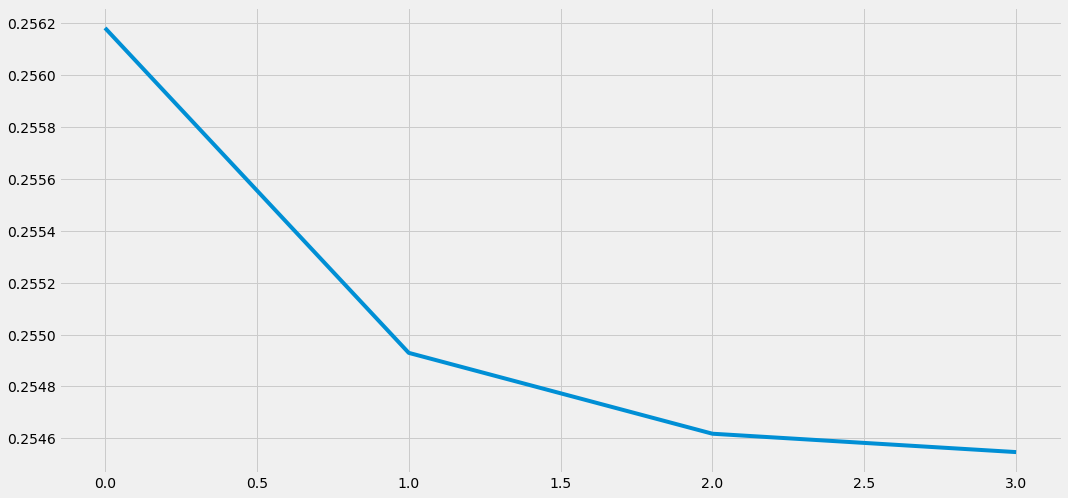

In [52]:
plt.plot(rmses)

Text(0, 0.5, 'dered_u')

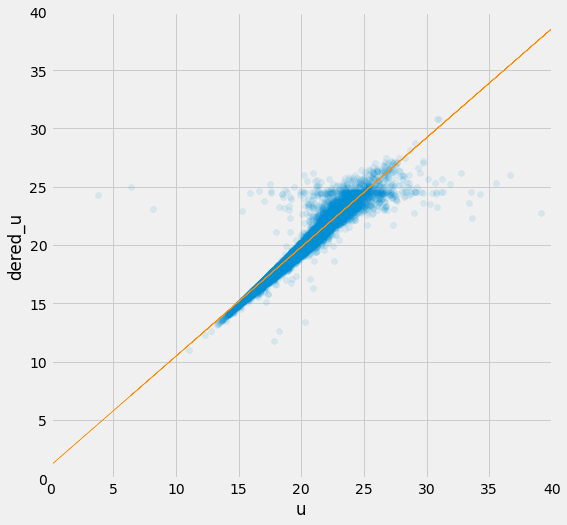

In [53]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, theta0 + theta1 * x, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

### Scikit-learn Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
p = lr.predict(X)

In [55]:
rmse(y, p) # numpy로 한 것보다 더 정확함

0.2522450693360897

In [56]:
lr.coef_, lr.intercept_

(array([0.9320425]), 1.1556424178625342)

Text(0, 0.5, 'dered_u')

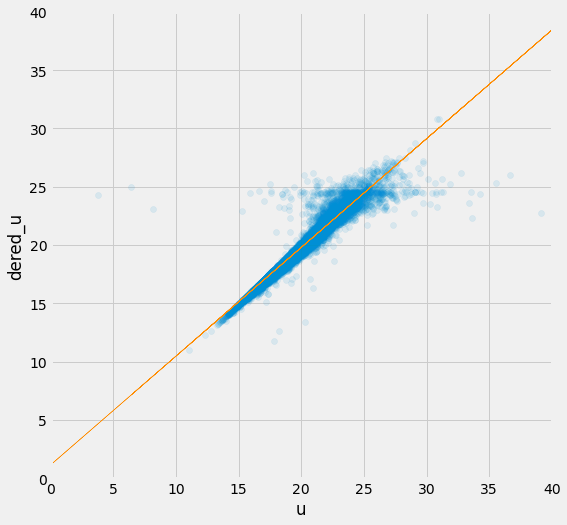

In [58]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, p, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')

### Scikit-learn Logistic Regression
cross entropy와 원리는 동일하다?

In [59]:
X = trn[trn['class'] != 0].drop('class', axis=1)
y = trn[trn['class'] != 0]['class'].values - 1
# Logistic regression 적용을 위해서 class 0 drop하고 1, 2에서 1씩 빼줌

In [60]:
np.unique(y)

array([0, 1])

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression()
lr.fit(X, y) # 학습
p = lr.predict_proba(X)[:, 1] # 예측, 범주형일 때 각 class에 속할 확률을 반환

In [62]:
lr.coef_, lr.intercept_ # 18개의 column

(array([[ 0.57218477,  0.09726588, -2.13452503,  0.52242619, -0.82787121,
         -2.30887654,  2.64749439,  0.03097581, -1.42792821,  0.93051177,
         -0.59406794,  0.09352556, -0.10639925, -0.18582184, -0.18820339,
         -0.1836131 , -0.18469814, -0.18699339]]), array([0.25626143]))

In [63]:
log_loss(y, p)

0.3639622200066008

In [64]:
roc_auc_score(y, p)

0.8769500801726807

In [ ]:
!pip install -U Kaggler

In [68]:
from kaggler.metrics import plot_roc_curve, plot_pr_curve

Text(0.5, 1.0, 'Precision-Recall Curve')

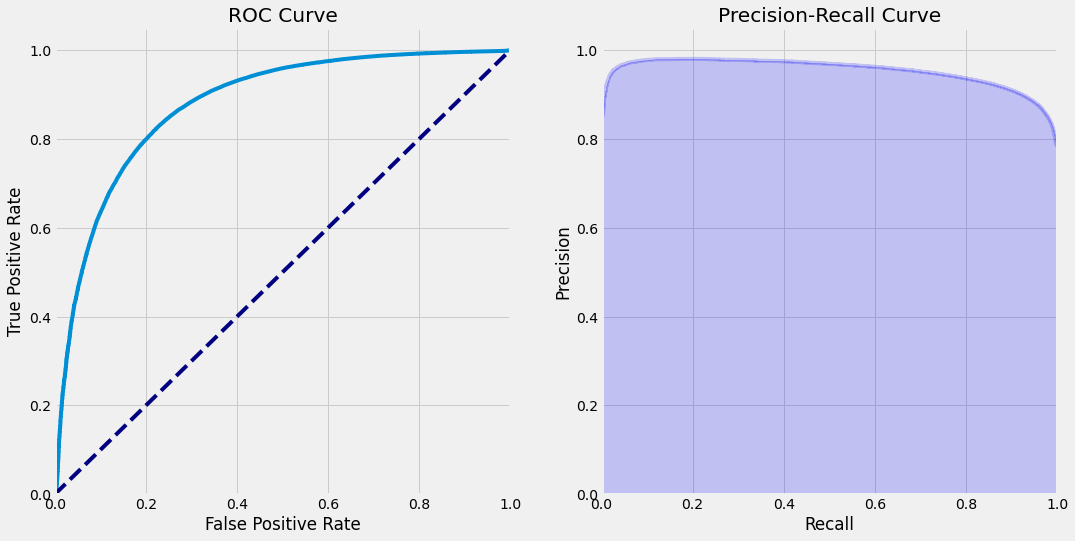

In [69]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_roc_curve(y, p);
plt.title('ROC Curve') # ROC, AUC 등은 추후에 다룰 예정
plt.subplot(1, 2, 2)
plot_pr_curve(y, p);
plt.title('Precision-Recall Curve')